<a href="https://colab.research.google.com/github/NesrineTahmi/ML-models-from-scratch/blob/main/KMeans/K_Means_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-Means Algorithm - From scratch using Numpy

*In this notebook i implement K-Means algorithm from scratch, without using scikit-learn*

## 1. Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

## 2. Loading dataset

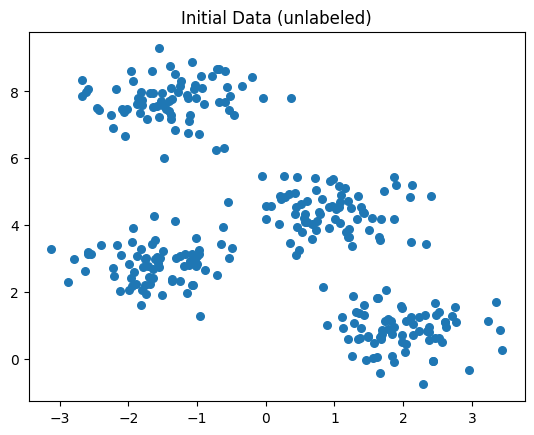

In [2]:
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=30)
plt.title("Initial Data (unlabeled)")
plt.show()

## 3. K Means algorithm implementation

In [8]:
class KMeans:
    def __init__(self, k=3, max_iters=100):
        self.k = k
        self.max_iters = max_iters
        self.centroids = None
        self.clusters = []

    def fit(self, X):
        self.nb_samples, self.nb_features = X.shape
        # random initialization of centroids
        random_idx = np.random.choice(self.nb_samples, self.k, replace = False)

        self.centroids = np.zeros((self.k, self.nb_features))
        for i in range(self.k):
          idx = random_idx[i]
          self.centroids[i] = X[idx]

        for _ in range(self.max_iters):
          self.clusters = self._create_clusters(X)
          old_centroids = self.centroids.copy()  #for verifying convergence later

          self.centroids = self._get_centroids(X, self.clusters)

          if self._is_converged(old_centroids, self.centroids):
                break
    def _create_clusters(self, X):
      # creating k empty liste (one for each cluster)
      clusters = []
      for _ in range(self.k):
          clusters.append([])

      #we do this for each point in our dataset
      for idx in range(self.nb_samples):
        point = X[idx]
        closest_idx = self._closest_centroid(point, self.centroids)
        clusters[closest_idx].append(idx)

      return clusters

    def _closest_centroid(self, point, centroids):
        distances = []
        for c in centroids:
            #euclidian distance
            dist = np.sqrt(np.sum((point - c)**2))
            distances.append(dist)

        return np.argmin(distances)


    def _get_centroids(self, X, clusters):
        new_centroids = np.zeros((self.k, self.nb_features))

        for cluster_idx in range(self.k):
            indices = clusters[cluster_idx]

            if len(indices) > 0:
                #we get the points that are in this cluster
                points = []
                for idx in indices:
                    points.append(X[idx])

                #computing mean
                new_centroids[cluster_idx] = np.mean(points, axis=0)
            else:
                #empty cluster
                new_centroids[cluster_idx] = self.centroids[cluster_idx]

        return new_centroids

    def _is_converged(self, old_centroids, new_centroids):
      movement = 0
      for i in range(self.k):
        distance = np.sqrt(sum((old_centroids[i] - new_centroids[i])**2))
        movement += distance

      return (movement == 0)

    def predict(self, X):
        results = []
        for point in X:
            closest_idx = self._closest_centroid(point, self.centroids)
            results.append(closest_idx)
        return np.array(results)


## 4. Testing the model

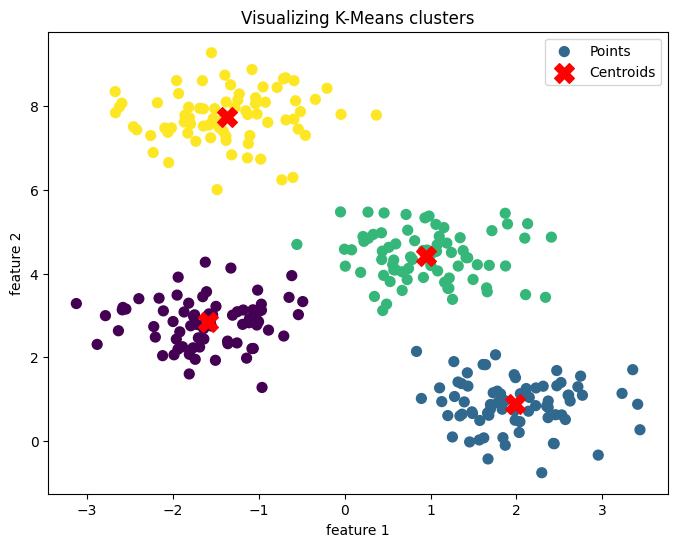

In [11]:
model = KMeans(k=4, max_iters=100)
model.fit(X)
y_kmeans = model.predict(X)

plt.figure(figsize=(8, 6))

#plotting clusters
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis', label='Points')


final_centroids = model.centroids
plt.scatter(final_centroids[:, 0], final_centroids[:, 1], c='red', s=200, marker='X', label='Centroids')

plt.title("Visualizing K-Means clusters")
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.legend()
plt.show()